# Data Loading

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import seaborn as sns
from tqdm.notebook import trange, tqdm

import wandb

from data import get_voltage_series

sns.set()

DATA_DIR = Path('../data')

In [20]:
# Do not read in 'Mix 1' sheet, as that has been updated in 'mix_1_updated.xlsx'
sheet_names = ['Seawater - No Heavy Metals', 'Copper', 'Cadmium', 'Lead']
xcel = pd.read_excel(DATA_DIR / 'main.xlsx', sheet_name=sheet_names)
# Read in updated mix sheet
mix = pd.read_excel(DATA_DIR / 'mix_1_updated.xlsx')

In [3]:
seawater = xcel['Seawater - No Heavy Metals']
copper = xcel['Copper']
cadmium = xcel['Cadmium']
lead = xcel['Lead']

In [22]:
mix.head()

,Cd ppb,Pb ppb,Hg ppb,Unnamed: 3,Unnamed: 4,Unnamed: 5,1,2,3,4,...,993,994,995,996,997,998,999,1000,1001,1002
0,100,100,100,HM mix 100 ppb,HM mix,HMM1,-2.171313,-2.295388,-2.295388,-2.233350,...,4.342625,4.342625,4.528738,4.590775,4.714850,4.838925,4.900963,5.087075,5.211150,5.273188
1,100,100,100,HM mix 100 ppb,HM mix,HMM1,-2.047238,-2.171313,-2.109275,-2.171313,...,4.466700,4.590775,4.714850,4.838925,4.900963,4.963000,5.211150,5.273188,5.459300,5.583375
2,100,100,100,HM mix 100 ppb 2nd day,HM mix,HMM1,-0.558338,-0.558338,-0.620375,-0.558338,...,3.846325,3.970400,4.032438,4.156513,4.342625,4.404663,4.590775,4.714850,4.838925,5.025038
3,100,100,100,HM mix 100 ppb 2nd day,HM mix,HMM1,-0.806488,-0.930563,-0.806488,-0.806488,...,4.032438,4.218550,4.218550,4.404663,4.466700,4.590775,4.714850,4.838925,4.963000,5.149113
4,100,100,100,Ocean 1 100 ppb,HM mix,HMM1,-0.434263,-0.434263,-0.434263,-0.434263,...,2.543538,2.605575,2.667613,2.729650,2.791688,2.853725,2.977800,3.039838,3.101875,3.225950


In [24]:
copper.head()

,Unnamed: 0,Unnamed: 1,Concentration,1,0.996,0.992,0.988,0.984,0.98,0.976,...,0.964.1,0.968.1,0.972.1,0.976.1,0.98.1,0.984.1,0.988.1,0.992.1,0.996.1,1.1
0,Cu 500ppb,Cu,500 ppb,-3.225950,-3.350025,-3.350025,-3.350025,-3.350025,-3.287988,-3.350025,...,8.685250,8.809325,8.933400,8.995438,9.119513,9.243588,9.367663,9.491738,9.615813,9.739888
1,Cu 500ppb,Cu,500 ppb,-4.032438,-4.094475,-4.094475,-4.094475,-4.094475,-4.094475,-4.094475,...,5.831525,5.955600,6.079675,6.203750,6.265788,6.389863,6.451900,6.700050,6.700050,6.886163
2,NC Cu 500 ppb 2nd day,Cu,500 ppb,-0.496300,-0.558338,-0.558338,-0.496300,-0.558338,-0.496300,-0.558338,...,3.350025,3.536138,3.536138,3.660213,3.722250,3.846325,3.846325,4.094475,4.156513,4.280588
3,NC Cu 500 ppb 2nd day,Cu,500 ppb,-0.806488,-0.744450,-0.744450,-0.744450,-0.744450,-0.682413,-0.682413,...,3.660213,3.784288,3.846325,3.970400,4.032438,4.156513,4.280588,4.404663,4.404663,4.590775
4,Ocean 1 500 ppb,Cu,500 ppb,-0.434263,-0.496300,-0.434263,-0.434263,-0.434263,-0.372225,-0.434263,...,2.667613,2.791688,2.853725,2.853725,2.977800,3.101875,3.163913,3.225950,3.287988,3.412063


In [27]:
len(copper.columns[3:])

1002

In [35]:
np.diff(copper.columns[3:500])

array([-0.0040000000000000036, -0.0040000000000000036,
       -0.0040000000000000036, -0.0040000000000000036,
       -0.0040000000000000036, -0.0040000000000000036,
       -0.0040000000000000036, -0.0040000000000000036,
       -0.0040000000000000036, -0.0040000000000000036,
       -0.0040000000000000036, -0.0040000000000000036,
       -0.0040000000000000036, -0.0040000000000000036,
       -0.0040000000000000036, -0.0039999999999998925,
       -0.0040000000000000036, -0.0040000000000000036,
       -0.0040000000000000036, -0.0040000000000000036,
       -0.0040000000000000036, -0.0040000000000000036,
       -0.0040000000000000036, -0.0040000000000000036,
       -0.0040000000000000036, -0.0040000000000000036,
       -0.0040000000000000036, -0.0040000000000000036,
       -0.0040000000000000036, -0.0040000000000000036,
       -0.0040000000000000036, -0.0040000000000000036,
       -0.0040000000000000036, -0.0040000000000000036,
       -0.0040000000000000036, -0.0040000000000000036,
       -0.

In [36]:
1 / 0.004

250.0

In [38]:
167 * 6

1002

# Old Data

In [7]:
df_old = pd.read_csv('/Users/king/Google Drive/1 Projects/electrochemistry_sean_mcintosh/info_from_waylon/data/20200220/25000/15JAN20-25ppmLeadAcetateBuffer07.txt',
                    skiprows=19)
df_old.head()

,Sample,Voltage (V),Current1 (uA),Unnamed: 3,Voltage (V).1,Current1 (uA).1,Unnamed: 6,Voltage (V).2,Current1 (uA).2
0,1,-1.200,-0.21125,NaN,-1.175,-20.415625,NaN,-1.225,-20.204375
1,2,-1.196,-0.21125,NaN,-1.171,-20.415625,NaN,-1.221,-20.204375
2,3,-1.192,-0.21125,NaN,-1.167,-20.415625,NaN,-1.217,-20.204375
3,4,-1.188,-0.21125,NaN,-1.163,-20.415625,NaN,-1.213,-20.204375
4,5,-1.184,-0.21125,NaN,-1.159,-20.415625,NaN,-1.209,-20.204375


In [9]:
df_old.describe()

,Sample,Voltage (V),Current1 (uA),Unnamed: 3,Voltage (V).1,Current1 (uA).1,Unnamed: 6,Voltage (V).2,Current1 (uA).2
count,1002.000000,1002.000000,1002.000000,0.0,1002.000000,1002.000000,0.0,1002.000000,1002.000000
mean,752.000000,-0.200000,0.747632,NaN,-0.200000,-3.907292,NaN,-0.200000,-4.654924
std,521.717656,0.578793,3.917274,NaN,0.579333,8.726708,NaN,0.579333,8.263561
min,1.000000,-1.200000,-2.409375,NaN,-1.225000,-20.415625,NaN,-1.225000,-20.305625
25%,251.250000,-0.700000,-0.022500,NaN,-0.700500,-2.446719,NaN,-0.700500,-10.249688
50%,752.000000,-0.200000,0.017500,NaN,-0.200000,0.009375,NaN,-0.200000,-0.000625
75%,1252.750000,0.300000,0.111250,NaN,0.300500,0.122344,NaN,0.300500,0.041250
max,1503.000000,0.800000,27.506875,NaN,0.825000,20.505625,NaN,0.825000,13.295625


In [41]:
df_V = df_old[[col for col in df_old if col.startswith('V')]]
df_V.describe()

,Voltage (V),Voltage (V).1,Voltage (V).2
count,1002.000000,1002.000000,1002.000000
mean,-0.200000,-0.200000,-0.200000
std,0.578793,0.579333,0.579333
min,-1.200000,-1.225000,-1.225000
25%,-0.700000,-0.700500,-0.700500
50%,-0.200000,-0.200000,-0.200000
75%,0.300000,0.300500,0.300500
max,0.800000,0.825000,0.825000


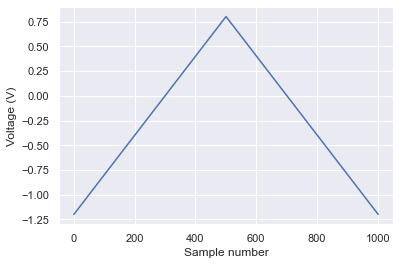

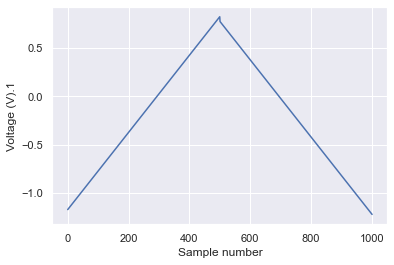

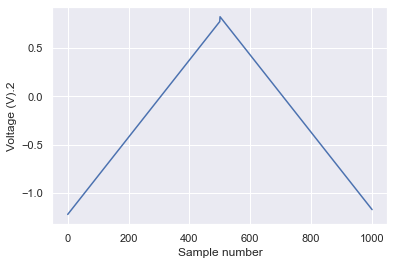

In [40]:
for col in df_old:
    if col.startswith('V'):
        plt.plot(df_old[col])
    #     plt.title(col)
        plt.xlabel('Sample number')
        plt.ylabel(col)
        plt.show()

In [13]:
df_old.columns

Index(['Sample', 'Voltage (V)', 'Current1 (uA)', 'Unnamed: 3', 'Voltage (V).1',
       'Current1 (uA).1', 'Unnamed: 6', 'Voltage (V).2', 'Current1 (uA).2'],
      dtype='object')

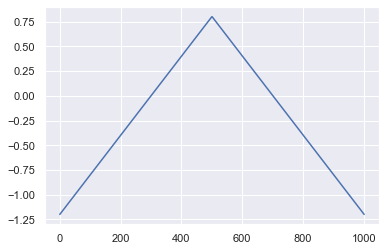

In [15]:
plt.plot(df_old['Voltage (V)'].values)
plt.show()

# Converting New Data To Long Form

In [44]:
copper.columns

Index([   'Unnamed: 0',    'Unnamed: 1', 'Concentration',               1,
                 0.996,           0.992,           0.988,           0.984,
                  0.98,           0.976,
       ...
             '0.964.1',       '0.968.1',       '0.972.1',       '0.976.1',
              '0.98.1',       '0.984.1',       '0.988.1',       '0.992.1',
             '0.996.1',           '1.1'],
      dtype='object', length=1005)

In [47]:
copper = copper.rename(columns={'Unnamed: 0': 'desc',
                                'Unnamed: 1': 'elt'})

In [48]:
copper.head()

,desc,elt,Concentration,1,0.996,0.992,0.988,0.984,0.98,0.976,...,0.964.1,0.968.1,0.972.1,0.976.1,0.98.1,0.984.1,0.988.1,0.992.1,0.996.1,1.1
0,Cu 500ppb,Cu,500 ppb,-3.225950,-3.350025,-3.350025,-3.350025,-3.350025,-3.287988,-3.350025,...,8.685250,8.809325,8.933400,8.995438,9.119513,9.243588,9.367663,9.491738,9.615813,9.739888
1,Cu 500ppb,Cu,500 ppb,-4.032438,-4.094475,-4.094475,-4.094475,-4.094475,-4.094475,-4.094475,...,5.831525,5.955600,6.079675,6.203750,6.265788,6.389863,6.451900,6.700050,6.700050,6.886163
2,NC Cu 500 ppb 2nd day,Cu,500 ppb,-0.496300,-0.558338,-0.558338,-0.496300,-0.558338,-0.496300,-0.558338,...,3.350025,3.536138,3.536138,3.660213,3.722250,3.846325,3.846325,4.094475,4.156513,4.280588
3,NC Cu 500 ppb 2nd day,Cu,500 ppb,-0.806488,-0.744450,-0.744450,-0.744450,-0.744450,-0.682413,-0.682413,...,3.660213,3.784288,3.846325,3.970400,4.032438,4.156513,4.280588,4.404663,4.404663,4.590775
4,Ocean 1 500 ppb,Cu,500 ppb,-0.434263,-0.496300,-0.434263,-0.434263,-0.434263,-0.372225,-0.434263,...,2.667613,2.791688,2.853725,2.853725,2.977800,3.101875,3.163913,3.225950,3.287988,3.412063


In [53]:
copper['metal_con'] = copper['elt'] + '_' + copper['Concentration']

In [57]:
copper = copper.drop(columns=['desc', 'elt', 'Concentration'])

In [60]:
copper.head()

,1,0.996,0.992,0.988,0.984,0.98,0.976,0.972,0.968,0.964,...,0.968.1,0.972.1,0.976.1,0.98.1,0.984.1,0.988.1,0.992.1,0.996.1,1.1,metal_con
0,-3.225950,-3.350025,-3.350025,-3.350025,-3.350025,-3.287988,-3.350025,-3.287988,-3.350025,-3.287988,...,8.809325,8.933400,8.995438,9.119513,9.243588,9.367663,9.491738,9.615813,9.739888,Cu_500 ppb
1,-4.032438,-4.094475,-4.094475,-4.094475,-4.094475,-4.094475,-4.094475,-4.032438,-4.032438,-4.156513,...,5.955600,6.079675,6.203750,6.265788,6.389863,6.451900,6.700050,6.700050,6.886163,Cu_500 ppb
2,-0.496300,-0.558338,-0.558338,-0.496300,-0.558338,-0.496300,-0.558338,-0.434263,-0.558338,-0.496300,...,3.536138,3.536138,3.660213,3.722250,3.846325,3.846325,4.094475,4.156513,4.280588,Cu_500 ppb
3,-0.806488,-0.744450,-0.744450,-0.744450,-0.744450,-0.682413,-0.682413,-0.682413,-0.620375,-0.682413,...,3.784288,3.846325,3.970400,4.032438,4.156513,4.280588,4.404663,4.404663,4.590775,Cu_500 ppb
4,-0.434263,-0.496300,-0.434263,-0.434263,-0.434263,-0.372225,-0.434263,-0.372225,-0.434263,-0.434263,...,2.791688,2.853725,2.853725,2.977800,3.101875,3.163913,3.225950,3.287988,3.412063,Cu_500 ppb


In [89]:
copper.T

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
1,-3.22595,-4.03244,-0.4963,-0.806488,-0.434263,-0.558338,-0.434263,-0.558338,-2.9778,-3.22595,...,-0.558338,-1.36482,-1.11668,-2.85372,-2.23335,-2.9778,-0.868525,-0.930563,-0.74445,-1.30279
0.996,-3.35003,-4.09448,-0.558338,-0.74445,-0.4963,-0.558338,-0.434263,-0.4963,-2.91576,-3.10188,...,-0.620375,-1.30279,-1.17871,-2.72965,-2.23335,-2.91576,-0.868525,-0.930563,-0.74445,-1.36482
0.992,-3.35003,-4.09448,-0.558338,-0.74445,-0.434263,-0.558338,-0.434263,-0.4963,-2.9778,-3.16391,...,-0.558338,-1.30279,-1.11668,-2.60557,-2.29539,-2.91576,-0.806488,-0.9926,-0.74445,-1.36482
0.988,-3.35003,-4.09448,-0.4963,-0.74445,-0.434263,-0.558338,-0.434263,-0.4963,-2.91576,-3.03984,...,-0.558338,-1.24075,-1.05464,-2.54354,-2.17131,-2.79169,-0.806488,-0.9926,-0.682413,-1.30279
0.984,-3.35003,-4.09448,-0.558338,-0.74445,-0.434263,-0.4963,-0.434263,-0.434263,-2.85372,-2.9778,...,-0.558338,-1.24075,-1.05464,-2.41946,-2.23335,-2.66761,-0.868525,-0.868525,-0.74445,-1.36482
0.98,-3.28799,-4.09448,-0.4963,-0.682413,-0.372225,-0.4963,-0.372225,-0.4963,-2.91576,-2.91576,...,-0.558338,-1.17871,-1.11668,-2.35743,-2.29539,-2.66761,-0.806488,-0.9926,-0.682413,-1.30279
0.976,-3.35003,-4.09448,-0.558338,-0.682413,-0.434263,-0.4963,-0.372225,-0.4963,-2.91576,-2.91576,...,-0.4963,-1.17871,-1.11668,-2.23335,-2.29539,-2.60557,-0.806488,-0.868525,-0.682413,-1.30279
0.972,-3.28799,-4.03244,-0.434263,-0.682413,-0.372225,-0.4963,-0.372225,-0.4963,-2.85372,-2.91576,...,-0.558338,-1.17871,-0.9926,-2.10927,-2.17131,-2.60557,-0.806488,-0.930563,-0.682413,-1.30279
0.968,-3.35003,-4.03244,-0.558338,-0.620375,-0.434263,-0.558338,-0.310188,-0.434263,-2.91576,-2.91576,...,-0.558338,-1.11668,-1.05464,-2.10927,-2.17131,-2.60557,-0.806488,-0.930563,-0.620375,-1.24075
0.964,-3.28799,-4.15651,-0.4963,-0.682413,-0.434263,-0.4963,-0.434263,-0.434263,-2.85372,-2.85372,...,-0.558338,-1.11668,-1.05464,-2.04724,-2.17131,-2.54354,-0.806488,-0.868525,-0.682413,-1.30279


In [63]:
copper_T = copper.T

In [71]:
cols_non_unique = copper_T.loc['metal_con', :].values
cols_non_unique

array(['Cu_500 ppb', 'Cu_500 ppb', 'Cu_500 ppb', 'Cu_500 ppb',
       'Cu_500 ppb', 'Cu_500 ppb', 'Cu_500 ppb', 'Cu_500 ppb',
       'Cu_1000 ppb', 'Cu_1000 ppb', 'Cu_1000 ppb', 'Cu_1000 ppb',
       'Cu_1000 ppb', 'Cu_1000 ppb', 'Cu_1000 ppb', 'Cu_2000 ppb',
       'Cu_2000 ppb', 'Cu_2000 ppb', 'Cu_2000 ppb', 'Cu_2000 ppb',
       'Cu_2000 ppb', 'Cu_3000 ppb', 'Cu_3000 ppb'], dtype=object)

In [74]:
i = 0
cols_unique = []
for col in cols_non_unique:
    col_unique = f'{col}_{i}'
    cols_unique.append(col_unique)
    i += 1

In [75]:
cols_unique

['Cu_500 ppb_0',
 'Cu_500 ppb_1',
 'Cu_500 ppb_2',
 'Cu_500 ppb_3',
 'Cu_500 ppb_4',
 'Cu_500 ppb_5',
 'Cu_500 ppb_6',
 'Cu_500 ppb_7',
 'Cu_1000 ppb_8',
 'Cu_1000 ppb_9',
 'Cu_1000 ppb_10',
 'Cu_1000 ppb_11',
 'Cu_1000 ppb_12',
 'Cu_1000 ppb_13',
 'Cu_1000 ppb_14',
 'Cu_2000 ppb_15',
 'Cu_2000 ppb_16',
 'Cu_2000 ppb_17',
 'Cu_2000 ppb_18',
 'Cu_2000 ppb_19',
 'Cu_2000 ppb_20',
 'Cu_3000 ppb_21',
 'Cu_3000 ppb_22']

In [77]:
copper_T.columns = cols_unique

In [82]:
copper_T = copper_T.drop(index='metal_con')

In [88]:
copper_T

,Cu_500 ppb_0,Cu_500 ppb_1,Cu_500 ppb_2,Cu_500 ppb_3,Cu_500 ppb_4,Cu_500 ppb_5,Cu_500 ppb_6,Cu_500 ppb_7,Cu_1000 ppb_8,Cu_1000 ppb_9,...,Cu_1000 ppb_13,Cu_1000 ppb_14,Cu_2000 ppb_15,Cu_2000 ppb_16,Cu_2000 ppb_17,Cu_2000 ppb_18,Cu_2000 ppb_19,Cu_2000 ppb_20,Cu_3000 ppb_21,Cu_3000 ppb_22
1,-3.22595,-4.03244,-0.4963,-0.806488,-0.434263,-0.558338,-0.434263,-0.558338,-2.9778,-3.22595,...,-0.558338,-1.36482,-1.11668,-2.85372,-2.23335,-2.9778,-0.868525,-0.930563,-0.74445,-1.30279
0.996,-3.35003,-4.09448,-0.558338,-0.74445,-0.4963,-0.558338,-0.434263,-0.4963,-2.91576,-3.10188,...,-0.620375,-1.30279,-1.17871,-2.72965,-2.23335,-2.91576,-0.868525,-0.930563,-0.74445,-1.36482
0.992,-3.35003,-4.09448,-0.558338,-0.74445,-0.434263,-0.558338,-0.434263,-0.4963,-2.9778,-3.16391,...,-0.558338,-1.30279,-1.11668,-2.60557,-2.29539,-2.91576,-0.806488,-0.9926,-0.74445,-1.36482
0.988,-3.35003,-4.09448,-0.4963,-0.74445,-0.434263,-0.558338,-0.434263,-0.4963,-2.91576,-3.03984,...,-0.558338,-1.24075,-1.05464,-2.54354,-2.17131,-2.79169,-0.806488,-0.9926,-0.682413,-1.30279
0.984,-3.35003,-4.09448,-0.558338,-0.74445,-0.434263,-0.4963,-0.434263,-0.434263,-2.85372,-2.9778,...,-0.558338,-1.24075,-1.05464,-2.41946,-2.23335,-2.66761,-0.868525,-0.868525,-0.74445,-1.36482
0.98,-3.28799,-4.09448,-0.4963,-0.682413,-0.372225,-0.4963,-0.372225,-0.4963,-2.91576,-2.91576,...,-0.558338,-1.17871,-1.11668,-2.35743,-2.29539,-2.66761,-0.806488,-0.9926,-0.682413,-1.30279
0.976,-3.35003,-4.09448,-0.558338,-0.682413,-0.434263,-0.4963,-0.372225,-0.4963,-2.91576,-2.91576,...,-0.4963,-1.17871,-1.11668,-2.23335,-2.29539,-2.60557,-0.806488,-0.868525,-0.682413,-1.30279
0.972,-3.28799,-4.03244,-0.434263,-0.682413,-0.372225,-0.4963,-0.372225,-0.4963,-2.85372,-2.91576,...,-0.558338,-1.17871,-0.9926,-2.10927,-2.17131,-2.60557,-0.806488,-0.930563,-0.682413,-1.30279
0.968,-3.35003,-4.03244,-0.558338,-0.620375,-0.434263,-0.558338,-0.310188,-0.434263,-2.91576,-2.91576,...,-0.558338,-1.11668,-1.05464,-2.10927,-2.17131,-2.60557,-0.806488,-0.930563,-0.620375,-1.24075
0.964,-3.28799,-4.15651,-0.4963,-0.682413,-0.434263,-0.4963,-0.434263,-0.434263,-2.85372,-2.85372,...,-0.558338,-1.11668,-1.05464,-2.04724,-2.17131,-2.54354,-0.806488,-0.868525,-0.682413,-1.30279


In [87]:
# INDEX HAS TO BE UNIQUE
copper_T['Cu_500 ppb_0']

1         -3.22595
0.996     -3.35003
0.992     -3.35003
0.988     -3.35003
0.984     -3.35003
0.98      -3.28799
0.976     -3.35003
0.972     -3.28799
0.968     -3.35003
0.964     -3.28799
0.96      -3.35003
0.956     -3.28799
0.952     -3.28799
0.948     -3.22595
0.944     -3.22595
0.94      -3.28799
0.936     -3.22595
0.932     -3.28799
0.928     -3.28799
0.924     -3.28799
0.92      -3.28799
0.916     -3.28799
0.912     -3.28799
0.908     -3.35003
0.904     -3.22595
0.9       -3.28799
0.896     -3.28799
0.892     -3.28799
0.888     -3.28799
0.884     -3.35003
            ...   
0.884.1    7.50654
0.888.1     7.4445
0.892.1    7.56858
0.896.1    7.63061
0.9.1      7.63061
0.904.1    7.69265
0.908.1    7.75469
0.912.1    7.75469
0.916.1    7.81672
0.92.1     7.87876
0.924.1    7.87876
0.928.1     7.9408
0.932.1    8.06488
0.936.1    8.12691
0.94.1     8.18895
0.944.1    8.25099
0.948.1    8.31302
0.952.1     8.4371
0.956.1    8.49914
0.96.1     8.62321
0.964.1    8.68525
0.968.1    8

In [106]:
a = np.arange(1, -1.004, -4e-3)
a[250] = 0
a

array([ 1.   ,  0.996,  0.992,  0.988,  0.984,  0.98 ,  0.976,  0.972,
        0.968,  0.964,  0.96 ,  0.956,  0.952,  0.948,  0.944,  0.94 ,
        0.936,  0.932,  0.928,  0.924,  0.92 ,  0.916,  0.912,  0.908,
        0.904,  0.9  ,  0.896,  0.892,  0.888,  0.884,  0.88 ,  0.876,
        0.872,  0.868,  0.864,  0.86 ,  0.856,  0.852,  0.848,  0.844,
        0.84 ,  0.836,  0.832,  0.828,  0.824,  0.82 ,  0.816,  0.812,
        0.808,  0.804,  0.8  ,  0.796,  0.792,  0.788,  0.784,  0.78 ,
        0.776,  0.772,  0.768,  0.764,  0.76 ,  0.756,  0.752,  0.748,
        0.744,  0.74 ,  0.736,  0.732,  0.728,  0.724,  0.72 ,  0.716,
        0.712,  0.708,  0.704,  0.7  ,  0.696,  0.692,  0.688,  0.684,
        0.68 ,  0.676,  0.672,  0.668,  0.664,  0.66 ,  0.656,  0.652,
        0.648,  0.644,  0.64 ,  0.636,  0.632,  0.628,  0.624,  0.62 ,
        0.616,  0.612,  0.608,  0.604,  0.6  ,  0.596,  0.592,  0.588,
        0.584,  0.58 ,  0.576,  0.572,  0.568,  0.564,  0.56 ,  0.556,
      

In [114]:
b = np.arange(-1, 1.004, 0.004)
b[250] = 0
b

array([-1.   , -0.996, -0.992, -0.988, -0.984, -0.98 , -0.976, -0.972,
       -0.968, -0.964, -0.96 , -0.956, -0.952, -0.948, -0.944, -0.94 ,
       -0.936, -0.932, -0.928, -0.924, -0.92 , -0.916, -0.912, -0.908,
       -0.904, -0.9  , -0.896, -0.892, -0.888, -0.884, -0.88 , -0.876,
       -0.872, -0.868, -0.864, -0.86 , -0.856, -0.852, -0.848, -0.844,
       -0.84 , -0.836, -0.832, -0.828, -0.824, -0.82 , -0.816, -0.812,
       -0.808, -0.804, -0.8  , -0.796, -0.792, -0.788, -0.784, -0.78 ,
       -0.776, -0.772, -0.768, -0.764, -0.76 , -0.756, -0.752, -0.748,
       -0.744, -0.74 , -0.736, -0.732, -0.728, -0.724, -0.72 , -0.716,
       -0.712, -0.708, -0.704, -0.7  , -0.696, -0.692, -0.688, -0.684,
       -0.68 , -0.676, -0.672, -0.668, -0.664, -0.66 , -0.656, -0.652,
       -0.648, -0.644, -0.64 , -0.636, -0.632, -0.628, -0.624, -0.62 ,
       -0.616, -0.612, -0.608, -0.604, -0.6  , -0.596, -0.592, -0.588,
       -0.584, -0.58 , -0.576, -0.572, -0.568, -0.564, -0.56 , -0.556,
      

In [117]:
voltage_series = np.append(a, b)

In [119]:
copper_T['voltage'] = voltage_series

In [129]:
new_col_order = ['voltage']
for col in copper_T.columns[:-1]:
    new_col_order.append(col)
copper_T = copper_T.loc[:, new_col_order]

In [132]:
copper_T = copper_T.reset_index()

In [136]:
copper_T = copper_T.drop('index', axis=1)

In [139]:
copper_T.head()

,voltage,Cu_500 ppb_0,Cu_500 ppb_1,Cu_500 ppb_2,Cu_500 ppb_3,Cu_500 ppb_4,Cu_500 ppb_5,Cu_500 ppb_6,Cu_500 ppb_7,Cu_1000 ppb_8,...,Cu_1000 ppb_13,Cu_1000 ppb_14,Cu_2000 ppb_15,Cu_2000 ppb_16,Cu_2000 ppb_17,Cu_2000 ppb_18,Cu_2000 ppb_19,Cu_2000 ppb_20,Cu_3000 ppb_21,Cu_3000 ppb_22
0,1.000,-3.22595,-4.03244,-0.4963,-0.806488,-0.434263,-0.558338,-0.434263,-0.558338,-2.9778,...,-0.558338,-1.36482,-1.11668,-2.85372,-2.23335,-2.9778,-0.868525,-0.930563,-0.74445,-1.30279
1,0.996,-3.35003,-4.09448,-0.558338,-0.74445,-0.4963,-0.558338,-0.434263,-0.4963,-2.91576,...,-0.620375,-1.30279,-1.17871,-2.72965,-2.23335,-2.91576,-0.868525,-0.930563,-0.74445,-1.36482
2,0.992,-3.35003,-4.09448,-0.558338,-0.74445,-0.434263,-0.558338,-0.434263,-0.4963,-2.9778,...,-0.558338,-1.30279,-1.11668,-2.60557,-2.29539,-2.91576,-0.806488,-0.9926,-0.74445,-1.36482
3,0.988,-3.35003,-4.09448,-0.4963,-0.74445,-0.434263,-0.558338,-0.434263,-0.4963,-2.91576,...,-0.558338,-1.24075,-1.05464,-2.54354,-2.17131,-2.79169,-0.806488,-0.9926,-0.682413,-1.30279
4,0.984,-3.35003,-4.09448,-0.558338,-0.74445,-0.434263,-0.4963,-0.434263,-0.434263,-2.85372,...,-0.558338,-1.24075,-1.05464,-2.41946,-2.23335,-2.66761,-0.868525,-0.868525,-0.74445,-1.36482


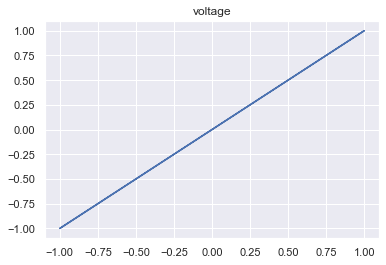

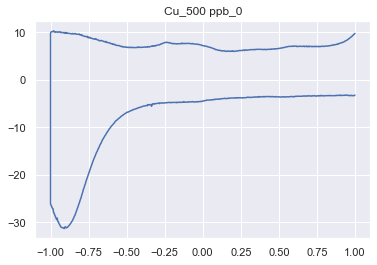

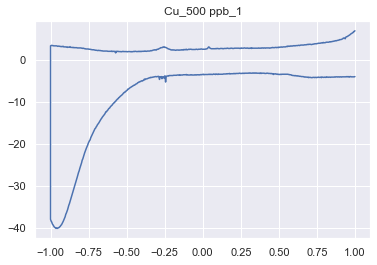

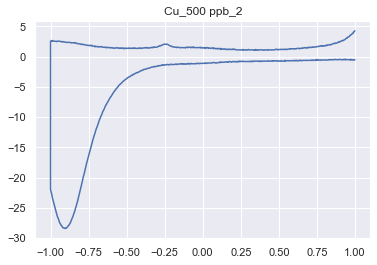

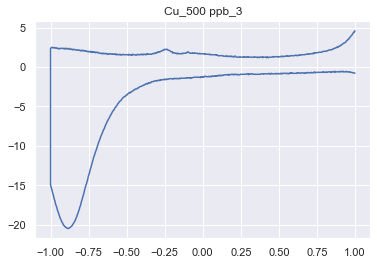

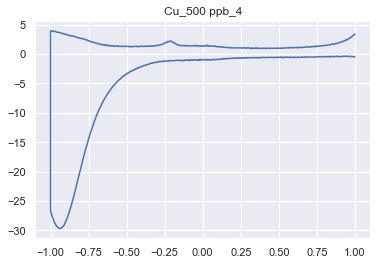

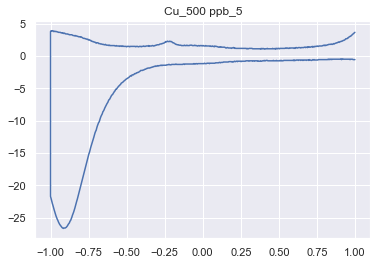

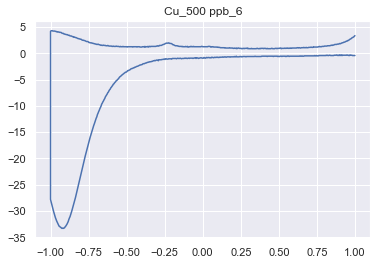

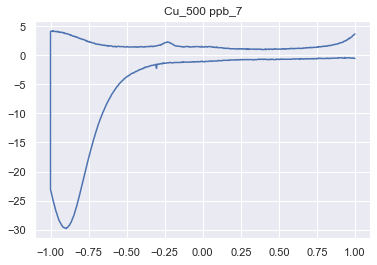

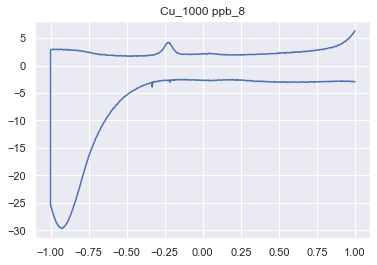

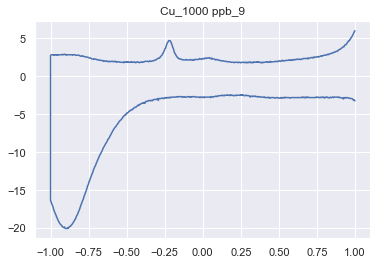

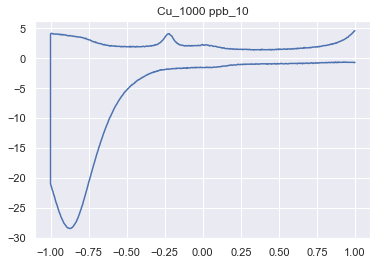

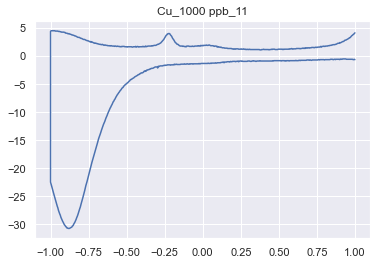

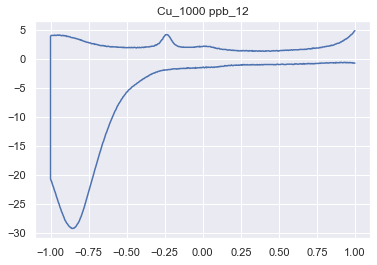

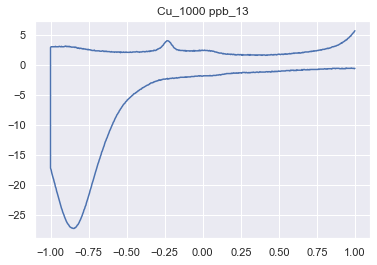

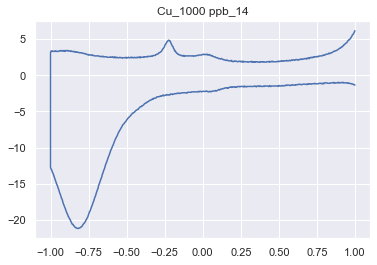

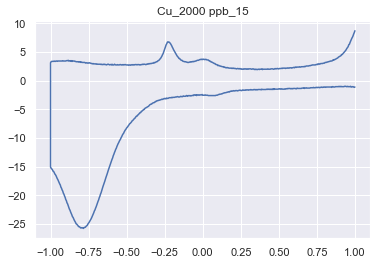

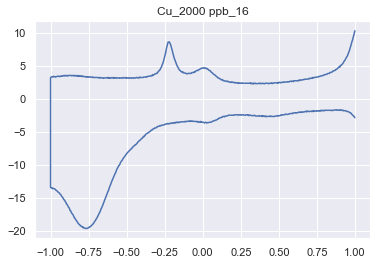

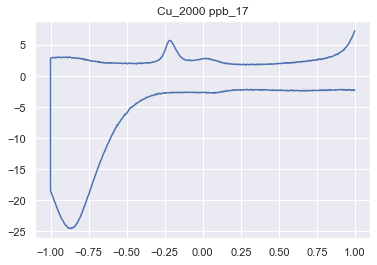

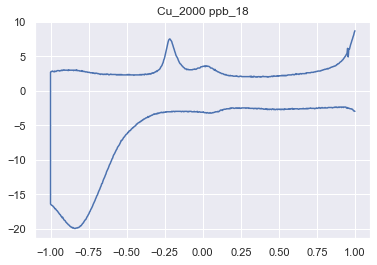

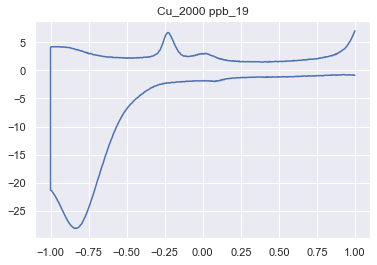

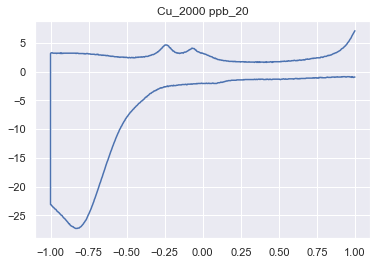

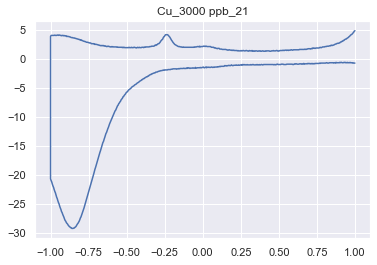

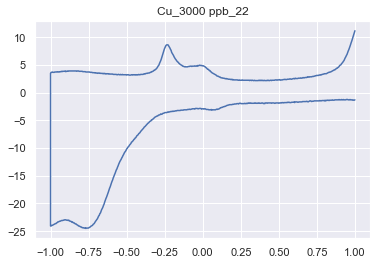

In [140]:
# Should I split the time series into 2?
for col in copper_T:
    plt.plot(copper_T.voltage, copper_T[col])
    plt.title(col)
    plt.show()

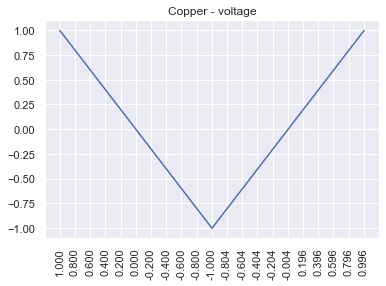

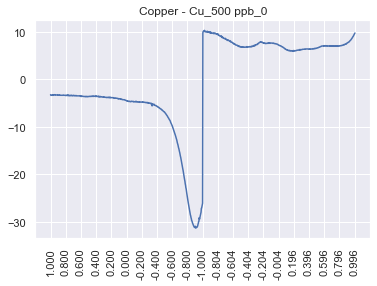

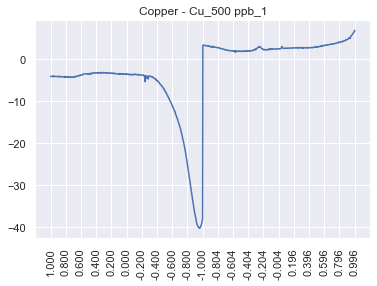

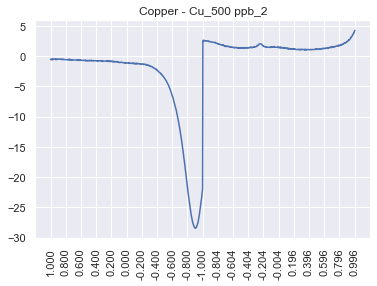

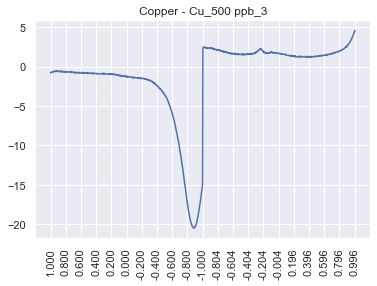

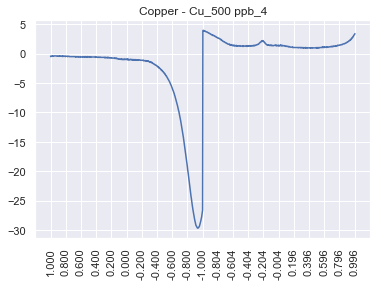

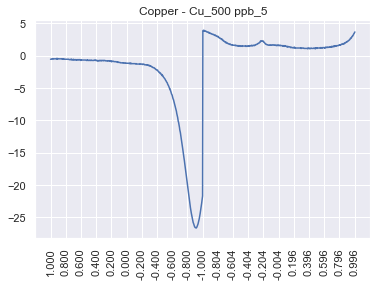

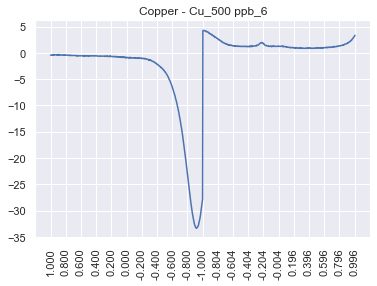

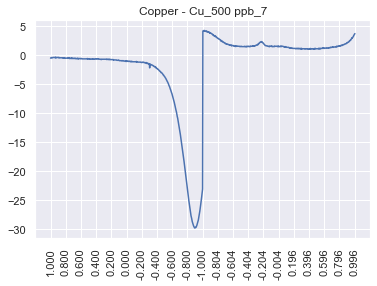

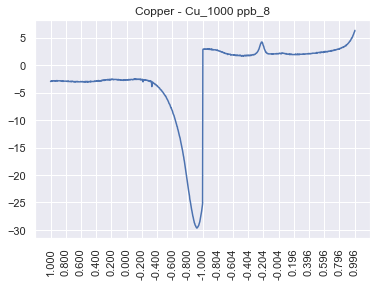

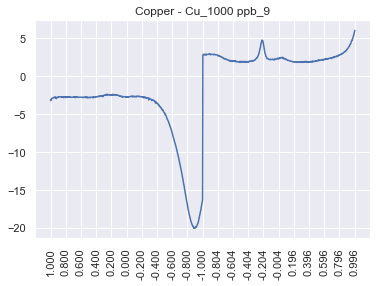

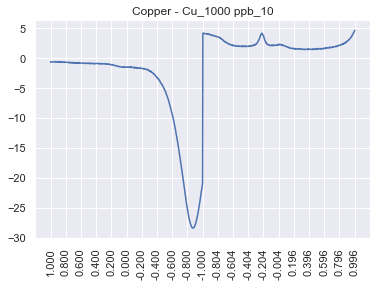

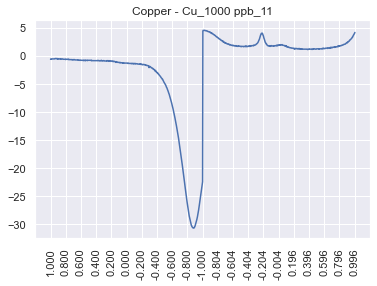

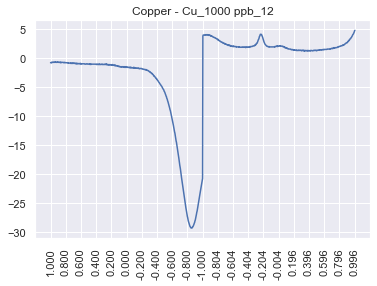

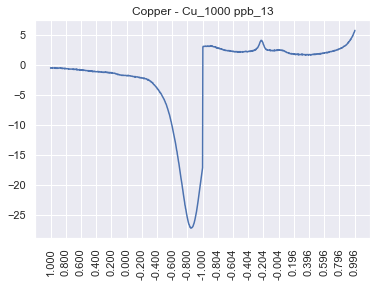

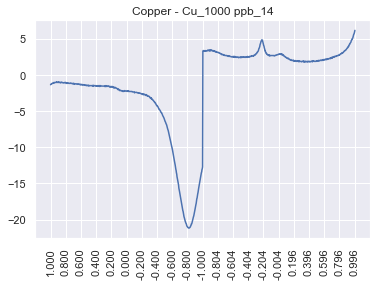

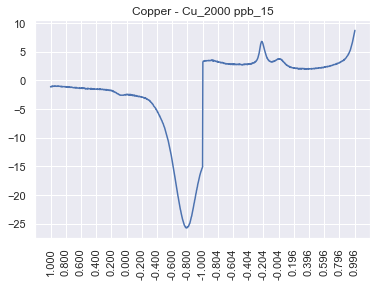

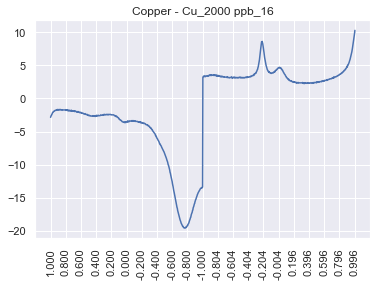

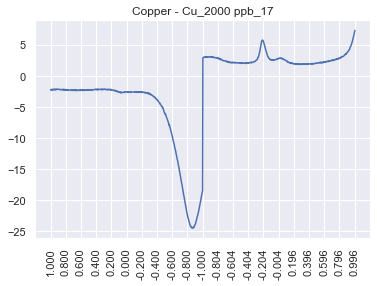

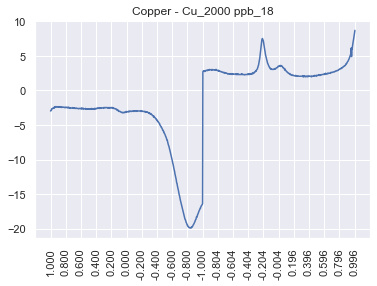

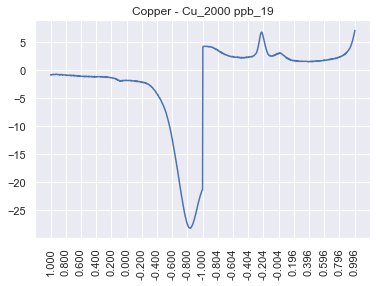

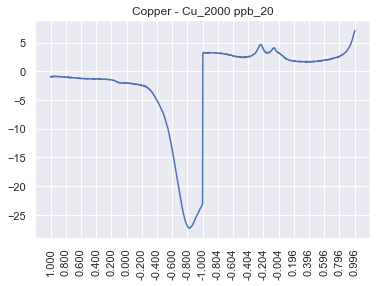

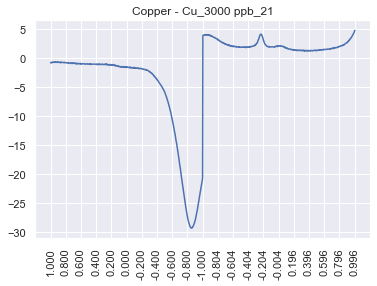

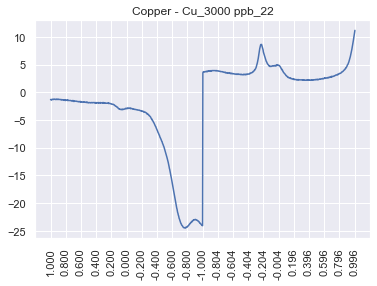

In [153]:
def get_ticks_labels(i):
    ticks = copper_T.index[::i]
    labels = [f'{c:.3f}' for c in copper_T.voltage[::i]]
    return ticks, labels

ticks, labels = get_ticks_labels(50)
# Or keep them as 1?
for col in copper_T:
    plt.plot(copper_T[col])
    plt.xticks(ticks=ticks, labels=labels, rotation='vertical')
    plt.title(f'Copper - {col}')
    plt.show()

In [158]:
volt_last = np.roll(copper_T.columns, -1)
volt_last

array(['Cu_500 ppb_0', 'Cu_500 ppb_1', 'Cu_500 ppb_2', 'Cu_500 ppb_3',
       'Cu_500 ppb_4', 'Cu_500 ppb_5', 'Cu_500 ppb_6', 'Cu_500 ppb_7',
       'Cu_1000 ppb_8', 'Cu_1000 ppb_9', 'Cu_1000 ppb_10',
       'Cu_1000 ppb_11', 'Cu_1000 ppb_12', 'Cu_1000 ppb_13',
       'Cu_1000 ppb_14', 'Cu_2000 ppb_15', 'Cu_2000 ppb_16',
       'Cu_2000 ppb_17', 'Cu_2000 ppb_18', 'Cu_2000 ppb_19',
       'Cu_2000 ppb_20', 'Cu_3000 ppb_21', 'Cu_3000 ppb_22', 'voltage'],
      dtype=object)

In [159]:
np.roll(volt_last, 1)

array(['voltage', 'Cu_500 ppb_0', 'Cu_500 ppb_1', 'Cu_500 ppb_2',
       'Cu_500 ppb_3', 'Cu_500 ppb_4', 'Cu_500 ppb_5', 'Cu_500 ppb_6',
       'Cu_500 ppb_7', 'Cu_1000 ppb_8', 'Cu_1000 ppb_9', 'Cu_1000 ppb_10',
       'Cu_1000 ppb_11', 'Cu_1000 ppb_12', 'Cu_1000 ppb_13',
       'Cu_1000 ppb_14', 'Cu_2000 ppb_15', 'Cu_2000 ppb_16',
       'Cu_2000 ppb_17', 'Cu_2000 ppb_18', 'Cu_2000 ppb_19',
       'Cu_2000 ppb_20', 'Cu_3000 ppb_21', 'Cu_3000 ppb_22'], dtype=object)

# Using `get_longform_df`

In [167]:
from data import get_longform_df

get_longform_df(copper).to_csv(DATA_DIR / 'copper.csv')

In [169]:
test = pd.read_csv(DATA_DIR / 'copper.csv', index_col=0)
test

,voltage,Cu_500 ppb_0,Cu_500 ppb_1,Cu_500 ppb_2,Cu_500 ppb_3,Cu_500 ppb_4,Cu_500 ppb_5,Cu_500 ppb_6,Cu_500 ppb_7,Cu_1000 ppb_8,...,Cu_1000 ppb_13,Cu_1000 ppb_14,Cu_2000 ppb_15,Cu_2000 ppb_16,Cu_2000 ppb_17,Cu_2000 ppb_18,Cu_2000 ppb_19,Cu_2000 ppb_20,Cu_3000 ppb_21,Cu_3000 ppb_22
0,1.000,-3.225950,-4.032438,-0.496300,-0.806488,-0.434263,-0.558338,-0.434263,-0.558338,-2.977800,...,-0.558338,-1.364825,-1.116675,-2.853725,-2.233350,-2.977800,-0.868525,-0.930563,-0.744450,-1.302788
1,0.996,-3.350025,-4.094475,-0.558338,-0.744450,-0.496300,-0.558338,-0.434263,-0.496300,-2.915763,...,-0.620375,-1.302788,-1.178713,-2.729650,-2.233350,-2.915763,-0.868525,-0.930563,-0.744450,-1.364825
2,0.992,-3.350025,-4.094475,-0.558338,-0.744450,-0.434263,-0.558338,-0.434263,-0.496300,-2.977800,...,-0.558338,-1.302788,-1.116675,-2.605575,-2.295388,-2.915763,-0.806488,-0.992600,-0.744450,-1.364825
3,0.988,-3.350025,-4.094475,-0.496300,-0.744450,-0.434263,-0.558338,-0.434263,-0.496300,-2.915763,...,-0.558338,-1.240750,-1.054638,-2.543538,-2.171313,-2.791688,-0.806488,-0.992600,-0.682413,-1.302788
4,0.984,-3.350025,-4.094475,-0.558338,-0.744450,-0.434263,-0.496300,-0.434263,-0.434263,-2.853725,...,-0.558338,-1.240750,-1.054638,-2.419463,-2.233350,-2.667613,-0.868525,-0.868525,-0.744450,-1.364825
5,0.980,-3.287988,-4.094475,-0.496300,-0.682413,-0.372225,-0.496300,-0.372225,-0.496300,-2.915763,...,-0.558338,-1.178713,-1.116675,-2.357425,-2.295388,-2.667613,-0.806488,-0.992600,-0.682413,-1.302788
6,0.976,-3.350025,-4.094475,-0.558338,-0.682413,-0.434263,-0.496300,-0.372225,-0.496300,-2.915763,...,-0.496300,-1.178713,-1.116675,-2.233350,-2.295388,-2.605575,-0.806488,-0.868525,-0.682413,-1.302788
7,0.972,-3.287988,-4.032438,-0.434263,-0.682413,-0.372225,-0.496300,-0.372225,-0.496300,-2.853725,...,-0.558338,-1.178713,-0.992600,-2.109275,-2.171313,-2.605575,-0.806488,-0.930563,-0.682413,-1.302788
8,0.968,-3.350025,-4.032438,-0.558338,-0.620375,-0.434263,-0.558338,-0.310188,-0.434263,-2.915763,...,-0.558338,-1.116675,-1.054638,-2.109275,-2.171313,-2.605575,-0.806488,-0.930563,-0.620375,-1.240750
9,0.964,-3.287988,-4.156513,-0.496300,-0.682413,-0.434263,-0.496300,-0.434263,-0.434263,-2.853725,...,-0.558338,-1.116675,-1.054638,-2.047238,-2.171313,-2.543538,-0.806488,-0.868525,-0.682413,-1.302788


# Seawater Processing

In [172]:
seawater.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,0.996,0.992,0.988,0.984,0.98,0.976,...,0.964.1,0.968.1,0.972.1,0.976.1,0.98.1,0.984.1,0.988.1,0.992.1,0.996.1,1.1
0,Honolulu,seawater,SW0,-0.693472,-0.674730,-0.718462,-0.649740,-0.693472,-0.637245,-0.674730,...,4.298280,4.410735,4.454467,4.573170,4.610655,4.748100,4.779337,4.923030,4.966762,5.110455
1,Honolulu,seawater,SW0,-0.312375,-0.274890,-0.306127,-0.256147,-0.281137,-0.249900,-0.274890,...,3.386145,3.461115,3.561075,3.642292,3.767242,3.842212,3.992152,4.060875,4.223310,4.298280
2,Honolulu,seawater,SW0,-0.574770,-0.637245,-0.562275,-0.606007,-0.531037,-0.581017,-0.506047,...,3.779737,3.854707,3.985905,4.092112,4.198320,4.304527,4.435725,4.573170,4.704367,4.860555
3,Honolulu,seawater,SW0,-0.568522,-0.562275,-0.574770,-0.543532,-0.549780,-0.518542,-0.518542,...,3.729757,3.829717,3.929677,4.023390,4.142092,4.242052,4.367002,4.473210,4.623150,4.735605
4,Honolulu,seawater,SW0,-0.568522,-0.562275,-0.574770,-0.543532,-0.549780,-0.518542,-0.518542,...,3.729757,3.829717,3.929677,4.023390,4.142092,4.242052,4.367002,4.473210,4.623150,4.735605


In [171]:
seawater.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2',            1,        0.996,
              0.992,        0.988,        0.984,         0.98,        0.976,
       ...
          '0.964.1',    '0.968.1',    '0.972.1',    '0.976.1',     '0.98.1',
          '0.984.1',    '0.988.1',    '0.992.1',    '0.996.1',        '1.1'],
      dtype='object', length=1005)

In [173]:
seawater.rename(columns={'Unnamed: 2': 'symbol'}, inplace=True)

In [174]:
from data import create_unique_col_names

seawater['unique_names'] = create_unique_col_names(seawater['symbol'])

In [178]:
seawater.drop(columns=seawater.columns[:3], inplace=True)

In [180]:
unique_names_first = np.roll(seawater.columns, 1)
seawater = seawater.loc[:, unique_names_first]

In [222]:
from data import get_voltage_series

seawater_T = seawater.T
seawater_T.columns = seawater['unique_names'].values
seawater_T.drop('unique_names', inplace=True)
seawater_T['voltage'] = get_voltage_series()

seawater_T.reset_index(inplace=True)
seawater_T.drop(columns='index', inplace=True)

voltage_first = np.roll(seawater_T.columns, 1)
seawater_T = seawater_T.loc[:, voltage_first]

In [224]:
seawater_T.to_csv(DATA_DIR / f'{name}.csv')

# Define `transform_to_long_form`

In [279]:
def write_as_long_form_to_csv(df, name):
    """
    First column is 'unique_names'. A descriptor column of the form
    Pb_50_ppm_0. Each must be unique (denoted by the differing final
    digit). 
    
    Transform into long form dataset with 'unique_names' now the columns,
    a RangeIndex and a column 'voltage' ranging from -1 to 1 and back again.
    
    Save this as a csv with name.
    """
    df_T = df.T
    df_T.columns = df['unique_names'].values
    df_T.drop('unique_names', inplace=True)
    df_T['voltage'] = get_voltage_series()

    df_T.reset_index(inplace=True)
    df_T.drop(columns='index', inplace=True)

    voltage_first = np.roll(df_T.columns, 1)
    df_T = df_T.loc[:, voltage_first]
    
    df_T.to_csv(DATA_DIR / f'{name}.csv')

# Lead Processing

In [226]:
lead.rename(columns={'Unnamed: 0': 'description'}, inplace=True)

In [232]:
lead['description'] = lead['description'].str[3:]

In [247]:
lead['description'] = lead.description.str.replace(' ', '_')

In [249]:
lead.drop(['Analyte', 'Concentration'], axis=1, inplace=True)

In [253]:
lead['unique_names'] = create_unique_col_names(lead.description.values)

In [255]:
lead.drop('description', axis=1, inplace=True)
unique_names_first = np.roll(lead.columns, 1)
lead = lead.loc[:, unique_names_first]

In [273]:
def create_wideform_with_unique_names_col(df):
    df_copy = df.copy()
    df_copy.rename(columns={'Unnamed: 0': 'description'}, inplace=True)
    df_copy['description'] = df_copy['description'].str[3:]
    df_copy['description'] = df_copy.description.str.replace(' ', '_')
    df_copy.drop(['Analyte', 'Concentration'], axis=1, inplace=True)
    df_copy['unique_names'] = create_unique_col_names(df_copy.description.values)
    df_copy.drop('description', axis=1, inplace=True)
    unique_names_first = np.roll(df_copy.columns, 1)
    df_copy = df_copy.loc[:, unique_names_first]
    return df_copy

In [258]:
write_as_long_form_to_csv(lead, 'lead')

# Cadmium Processing

In [276]:
cadmium

,Unnamed: 0,Analyte,Concentration,1,0.996,0.992,0.988,0.984,0.98,0.976,...,0.964.1,0.968.1,0.972.1,0.976.1,0.98.1,0.984.1,0.988.1,0.992.1,0.996.1,1.1
0,KW Cd 50 ppb,Cd,50 ppb,-0.558338,-0.620375,-0.496300,-0.558338,-0.558338,-0.496300,-0.496300,...,2.915763,2.977800,3.101875,3.163913,3.225950,3.350025,3.412063,3.474100,3.598175,3.722250
1,KW Cd 50 ppb,Cd,50 ppb,-0.682413,-0.682413,-0.620375,-0.620375,-0.558338,-0.620375,-0.558338,...,3.101875,3.225950,3.350025,3.350025,3.474100,3.536138,3.660213,3.784288,3.846325,3.970400
2,KW Cd 50 ppb,Cd,50 ppb,-0.558338,-0.496300,-0.496300,-0.496300,-0.434263,-0.434263,-0.496300,...,2.977800,3.039838,3.101875,3.225950,3.287988,3.350025,3.536138,3.598175,3.722250,3.846325
3,KW Cd 50 ppb,Cd,50 ppb,-0.620375,-0.620375,-0.620375,-0.558338,-0.558338,-0.558338,-0.558338,...,3.287988,3.350025,3.412063,3.474100,3.598175,3.722250,3.846325,3.908363,4.094475,4.218550
4,KW Cd 125 ppb,Cd,125 ppb,-0.682413,-0.682413,-0.744450,-0.682413,-0.682413,-0.620375,-0.620375,...,3.287988,3.350025,3.412063,3.536138,3.598175,3.660213,3.784288,3.846325,3.970400,4.032438
5,KW Cd 125 ppb,Cd,125 ppb,-0.744450,-0.806488,-0.806488,-0.806488,-0.806488,-0.744450,-0.744450,...,3.598175,3.660213,3.784288,3.846325,3.908363,4.032438,4.156513,4.218550,4.280588,4.404663
6,KW Cd 125 ppb,Cd,125 ppb,-0.744450,-0.806488,-0.744450,-0.744450,-0.744450,-0.682413,-0.682413,...,3.536138,3.722250,3.722250,3.846325,3.908363,3.970400,4.094475,4.280588,4.342625,4.466700
7,KW Cd 125 ppb,Cd,125 ppb,-0.868525,-0.868525,-0.930563,-0.868525,-0.806488,-0.868525,-0.868525,...,4.032438,4.032438,4.156513,4.280588,4.342625,4.466700,4.528738,4.714850,4.776888,4.900963
8,KW Cd 250 ppb,Cd,250 ppb,-0.868525,-0.930563,-0.868525,-0.868525,-0.806488,-0.868525,-0.868525,...,3.908363,3.970400,4.032438,4.156513,4.218550,4.342625,4.466700,4.528738,4.652813,4.776888
9,KW Cd 250 ppb,Cd,250 ppb,-1.054638,-0.992600,-0.992600,-0.992600,-0.992600,-0.930563,-0.930563,...,4.280588,4.342625,4.466700,4.528738,4.652813,4.714850,4.838925,4.900963,5.025038,5.149113


In [280]:
cadmium_wide = create_wideform_with_unique_names_col(cadmium)
write_as_long_form_to_csv(cadmium_wide, 'cadmium')

In [278]:
cadmium

,Unnamed: 0,Analyte,Concentration,1,0.996,0.992,0.988,0.984,0.98,0.976,...,0.964.1,0.968.1,0.972.1,0.976.1,0.98.1,0.984.1,0.988.1,0.992.1,0.996.1,1.1
0,KW Cd 50 ppb,Cd,50 ppb,-0.558338,-0.620375,-0.496300,-0.558338,-0.558338,-0.496300,-0.496300,...,2.915763,2.977800,3.101875,3.163913,3.225950,3.350025,3.412063,3.474100,3.598175,3.722250
1,KW Cd 50 ppb,Cd,50 ppb,-0.682413,-0.682413,-0.620375,-0.620375,-0.558338,-0.620375,-0.558338,...,3.101875,3.225950,3.350025,3.350025,3.474100,3.536138,3.660213,3.784288,3.846325,3.970400
2,KW Cd 50 ppb,Cd,50 ppb,-0.558338,-0.496300,-0.496300,-0.496300,-0.434263,-0.434263,-0.496300,...,2.977800,3.039838,3.101875,3.225950,3.287988,3.350025,3.536138,3.598175,3.722250,3.846325
3,KW Cd 50 ppb,Cd,50 ppb,-0.620375,-0.620375,-0.620375,-0.558338,-0.558338,-0.558338,-0.558338,...,3.287988,3.350025,3.412063,3.474100,3.598175,3.722250,3.846325,3.908363,4.094475,4.218550
4,KW Cd 125 ppb,Cd,125 ppb,-0.682413,-0.682413,-0.744450,-0.682413,-0.682413,-0.620375,-0.620375,...,3.287988,3.350025,3.412063,3.536138,3.598175,3.660213,3.784288,3.846325,3.970400,4.032438
5,KW Cd 125 ppb,Cd,125 ppb,-0.744450,-0.806488,-0.806488,-0.806488,-0.806488,-0.744450,-0.744450,...,3.598175,3.660213,3.784288,3.846325,3.908363,4.032438,4.156513,4.218550,4.280588,4.404663
6,KW Cd 125 ppb,Cd,125 ppb,-0.744450,-0.806488,-0.744450,-0.744450,-0.744450,-0.682413,-0.682413,...,3.536138,3.722250,3.722250,3.846325,3.908363,3.970400,4.094475,4.280588,4.342625,4.466700
7,KW Cd 125 ppb,Cd,125 ppb,-0.868525,-0.868525,-0.930563,-0.868525,-0.806488,-0.868525,-0.868525,...,4.032438,4.032438,4.156513,4.280588,4.342625,4.466700,4.528738,4.714850,4.776888,4.900963
8,KW Cd 250 ppb,Cd,250 ppb,-0.868525,-0.930563,-0.868525,-0.868525,-0.806488,-0.868525,-0.868525,...,3.908363,3.970400,4.032438,4.156513,4.218550,4.342625,4.466700,4.528738,4.652813,4.776888
9,KW Cd 250 ppb,Cd,250 ppb,-1.054638,-0.992600,-0.992600,-0.992600,-0.992600,-0.930563,-0.930563,...,4.280588,4.342625,4.466700,4.528738,4.652813,4.714850,4.838925,4.900963,5.025038,5.149113


# Copper Processing

In [4]:
copper = pd.read_csv(DATA_DIR / 'copper.csv', index_col=0)

In [8]:
cols = copper.columns
copper.columns = [col.replace(' ', '_') for col in cols]
copper

,voltage,Cu_500_ppb_0,Cu_500_ppb_1,Cu_500_ppb_2,Cu_500_ppb_3,Cu_500_ppb_4,Cu_500_ppb_5,Cu_500_ppb_6,Cu_500_ppb_7,Cu_1000_ppb_8,...,Cu_1000_ppb_13,Cu_1000_ppb_14,Cu_2000_ppb_15,Cu_2000_ppb_16,Cu_2000_ppb_17,Cu_2000_ppb_18,Cu_2000_ppb_19,Cu_2000_ppb_20,Cu_3000_ppb_21,Cu_3000_ppb_22
0,1.000,-3.225950,-4.032438,-0.496300,-0.806488,-0.434263,-0.558338,-0.434263,-0.558338,-2.977800,...,-0.558338,-1.364825,-1.116675,-2.853725,-2.233350,-2.977800,-0.868525,-0.930563,-0.744450,-1.302788
1,0.996,-3.350025,-4.094475,-0.558338,-0.744450,-0.496300,-0.558338,-0.434263,-0.496300,-2.915763,...,-0.620375,-1.302788,-1.178713,-2.729650,-2.233350,-2.915763,-0.868525,-0.930563,-0.744450,-1.364825
2,0.992,-3.350025,-4.094475,-0.558338,-0.744450,-0.434263,-0.558338,-0.434263,-0.496300,-2.977800,...,-0.558338,-1.302788,-1.116675,-2.605575,-2.295388,-2.915763,-0.806488,-0.992600,-0.744450,-1.364825
3,0.988,-3.350025,-4.094475,-0.496300,-0.744450,-0.434263,-0.558338,-0.434263,-0.496300,-2.915763,...,-0.558338,-1.240750,-1.054638,-2.543538,-2.171313,-2.791688,-0.806488,-0.992600,-0.682413,-1.302788
4,0.984,-3.350025,-4.094475,-0.558338,-0.744450,-0.434263,-0.496300,-0.434263,-0.434263,-2.853725,...,-0.558338,-1.240750,-1.054638,-2.419463,-2.233350,-2.667613,-0.868525,-0.868525,-0.744450,-1.364825
5,0.980,-3.287988,-4.094475,-0.496300,-0.682413,-0.372225,-0.496300,-0.372225,-0.496300,-2.915763,...,-0.558338,-1.178713,-1.116675,-2.357425,-2.295388,-2.667613,-0.806488,-0.992600,-0.682413,-1.302788
6,0.976,-3.350025,-4.094475,-0.558338,-0.682413,-0.434263,-0.496300,-0.372225,-0.496300,-2.915763,...,-0.496300,-1.178713,-1.116675,-2.233350,-2.295388,-2.605575,-0.806488,-0.868525,-0.682413,-1.302788
7,0.972,-3.287988,-4.032438,-0.434263,-0.682413,-0.372225,-0.496300,-0.372225,-0.496300,-2.853725,...,-0.558338,-1.178713,-0.992600,-2.109275,-2.171313,-2.605575,-0.806488,-0.930563,-0.682413,-1.302788
8,0.968,-3.350025,-4.032438,-0.558338,-0.620375,-0.434263,-0.558338,-0.310188,-0.434263,-2.915763,...,-0.558338,-1.116675,-1.054638,-2.109275,-2.171313,-2.605575,-0.806488,-0.930563,-0.620375,-1.240750
9,0.964,-3.287988,-4.156513,-0.496300,-0.682413,-0.434263,-0.496300,-0.434263,-0.434263,-2.853725,...,-0.558338,-1.116675,-1.054638,-2.047238,-2.171313,-2.543538,-0.806488,-0.868525,-0.682413,-1.302788


In [10]:
copper.to_csv(DATA_DIR / 'copper.csv')

# Mix Processing

In [45]:
mix['mix_description'] = 'mix_' + mix['Cd ppb'].astype(str) + '_ppb'

In [47]:
mix['metal_conc_desc'] = 'Cd_' + mix['Cd ppb'].astype(str) + '_' \
                       + 'Pb_' + mix['Cd ppb'].astype(str) + '_' \
                       + 'Hg_' + mix['Cd ppb'].astype(str)

In [54]:
mix.drop(68, inplace=True)

In [59]:
mix.drop(columns=mix.columns[:6], inplace=True)

In [62]:
new_col_order = np.roll(mix.columns, 2)
mix = mix.loc[:, new_col_order]

,mix_description,metal_conc_desc,1,2,3,4,5,6,7,8,...,993,994,995,996,997,998,999,1000,1001,1002
0,mix_100_ppb,Cd_100_Pb_100_Hg_100,-2.171313,-2.295388,-2.295388,-2.233350,-2.233350,-2.171313,-2.171313,-2.233350,...,4.342625,4.342625,4.528738,4.590775,4.714850,4.838925,4.900963,5.087075,5.211150,5.273188
1,mix_100_ppb,Cd_100_Pb_100_Hg_100,-2.047238,-2.171313,-2.109275,-2.171313,-2.109275,-2.109275,-2.109275,-2.047238,...,4.466700,4.590775,4.714850,4.838925,4.900963,4.963000,5.211150,5.273188,5.459300,5.583375
2,mix_100_ppb,Cd_100_Pb_100_Hg_100,-0.558338,-0.558338,-0.620375,-0.558338,-0.558338,-0.496300,-0.496300,-0.558338,...,3.846325,3.970400,4.032438,4.156513,4.342625,4.404663,4.590775,4.714850,4.838925,5.025038
3,mix_100_ppb,Cd_100_Pb_100_Hg_100,-0.806488,-0.930563,-0.806488,-0.806488,-0.806488,-0.806488,-0.682413,-0.806488,...,4.032438,4.218550,4.218550,4.404663,4.466700,4.590775,4.714850,4.838925,4.963000,5.149113
4,mix_100_ppb,Cd_100_Pb_100_Hg_100,-0.434263,-0.434263,-0.434263,-0.434263,-0.434263,-0.372225,-0.372225,-0.434263,...,2.543538,2.605575,2.667613,2.729650,2.791688,2.853725,2.977800,3.039838,3.101875,3.225950
5,mix_100_ppb,Cd_100_Pb_100_Hg_100,-0.558338,-0.496300,-0.558338,-0.558338,-0.496300,-0.434263,-0.496300,-0.496300,...,2.791688,2.853725,2.915763,2.915763,3.101875,3.163913,3.225950,3.350025,3.412063,3.536138
6,mix_100_ppb,Cd_100_Pb_100_Hg_100,-0.620375,-0.558338,-0.620375,-0.558338,-0.620375,-0.558338,-0.558338,-0.496300,...,3.536138,3.660213,3.722250,3.846325,3.970400,4.094475,4.156513,4.280588,4.342625,4.404663
7,mix_100_ppb,Cd_100_Pb_100_Hg_100,-0.744450,-0.806488,-0.744450,-0.744450,-0.682413,-0.682413,-0.682413,-0.620375,...,4.032438,4.094475,4.218550,4.342625,4.404663,4.466700,4.652813,4.714850,4.900963,4.963000
8,mix_200_ppb,Cd_200_Pb_200_Hg_200,-0.687225,-0.712215,-0.705967,-0.693472,-0.687225,-0.674730,-0.668482,-0.662235,...,6.391192,6.478657,6.559875,6.653587,6.741052,6.834765,6.928477,7.028437,7.115902,7.215862
9,mix_200_ppb,Cd_200_Pb_200_Hg_200,-2.024190,-2.155387,-2.136645,-2.117902,-2.099160,-2.080417,-2.061675,-2.042932,...,8.421630,8.521590,8.615302,8.715262,8.808975,8.915182,9.008895,9.052627,9.265042,9.346260


In [78]:
# First create csv with columns titled 'mix_100_ppb'
mix_T = mix.T
# mix_T.reset_index(inplace=True)
mix_T.columns = mix_T.loc['mix_description', :].values
mix_T = mix_T.drop(index=['mix_description', 'metal_conc_desc'])
mix_T = mix_T.reset_index()
mix_T = mix_T.drop(columns=['index'])
mix_T.insert(0, 'voltage', get_voltage_series())
mix_T.to_csv(DATA_DIR / 'mix.csv')

In [82]:
# Now create csv with columns including metal names e.g. 'Cd_100_Pb_100_Hg_100'
mix_T = mix.T
mix_T.columns = mix_T.loc['metal_conc_desc', :].values
mix_T = mix_T.drop(index=['mix_description', 'metal_conc_desc'])
mix_T = mix_T.reset_index()
mix_T = mix_T.drop(columns=['index'])
mix_T.insert(0, 'voltage', get_voltage_series())
mix_T.to_csv(DATA_DIR / 'mix_element_concentration.csv')